In [93]:
# import libraries
import pandas as pd
import sklearn
assert sklearn.__version__ >= ".20"

# remove warnings
import warnings
warnings.filterwarnings('ignore')

import sys
assert sys.version_info >= (3, 5)

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as matplot
from matplotlib import colors


from sklearn import datasets
from sklearn import metrics
from sklearn import cluster
from sklearn.preprocessing import scale
from sklearn.preprocessing import LabelEncoder

In [94]:
#first step, reading the data we chose & downloaded.

HFi = pd.read_csv("hfi_cc_2022.csv")
print(HFi)

      year      countries                         region  hf_score  hf_rank  \
0     2020        Albania                 Eastern Europe      7.67     47.0   
1     2020        Algeria     Middle East & North Africa      5.13    154.0   
2     2020         Angola             Sub-Saharan Africa      5.97    122.0   
3     2020      Argentina  Latin America & the Caribbean      6.99     74.0   
4     2020        Armenia        Caucasus & Central Asia      8.14     26.0   
...    ...            ...                            ...       ...      ...   
3460  2000  Venezuela, RB  Latin America & the Caribbean      6.43     86.0   
3461  2000        Vietnam                     South Asia      5.51    113.0   
3462  2000    Yemen, Rep.     Middle East & North Africa       NaN      NaN   
3463  2000         Zambia             Sub-Saharan Africa      7.03     72.0   
3464  2000       Zimbabwe             Sub-Saharan Africa      5.35    116.0   

      hf_quartile  pf_rol_procedural  pf_rol_civil 

In [95]:
#specifying that we only want the data from 2020. 

HFi_20 = HFi[HFi["year"]==2020]
print(HFi_20)

     year      countries                         region  hf_score  hf_rank  \
0    2020        Albania                 Eastern Europe      7.67     47.0   
1    2020        Algeria     Middle East & North Africa      5.13    154.0   
2    2020         Angola             Sub-Saharan Africa      5.97    122.0   
3    2020      Argentina  Latin America & the Caribbean      6.99     74.0   
4    2020        Armenia        Caucasus & Central Asia      8.14     26.0   
..    ...            ...                            ...       ...      ...   
160  2020  Venezuela, RB  Latin America & the Caribbean      4.09    163.0   
161  2020        Vietnam                     South Asia      5.64    132.0   
162  2020    Yemen, Rep.     Middle East & North Africa      3.94    164.0   
163  2020         Zambia             Sub-Saharan Africa      6.38    109.0   
164  2020       Zimbabwe             Sub-Saharan Africa      5.25    151.0   

     hf_quartile  pf_rol_procedural  pf_rol_civil  pf_rol_crimi

In [96]:
#specify even further, just want the statistics to do with crime. 

HFi_20_crime = HFi_20[["pf_ss_homicide", "pf_ss_disappearances", "pf_ss_disappearances_violent", "pf_ss_disappearances_fatalities", "pf_ss_disappearances_torture", "ef_legal_police", "countries"]]
print(HFi_20_crime)

     pf_ss_homicide  pf_ss_disappearances  pf_ss_disappearances_violent  \
0          9.343023              9.156429                     10.000000   
1          9.616279              8.063869                      9.687083   
2          8.590305              8.357258                      9.582498   
3          8.505814              8.503983                     10.000000   
4          9.491279              9.300357                     10.000000   
..              ...                   ...                           ...   
160        0.000000              6.741380                     10.000000   
161        9.558607              8.864286                     10.000000   
162        8.064389              0.226071                      0.000000   
163        8.459900              8.221429                     10.000000   
164        8.430233              6.455714                     10.000000   

     pf_ss_disappearances_fatalities  pf_ss_disappearances_torture  \
0                          10

In [97]:
#segment our data to only include G20 countries, since those are the ones we're focusing on. 

G20 = ["Argentina", "Australia", "Brazil", "Canada", "China", "France", "Germany", "India", "Indonesia", "Italy", "Japan", "Mexico", "Russian Federation", "Saudi Arabia", "South Africa", "Korea, Rep.", "Turkey", "United Kingdom", "United States"]

print(G20)

#put these stats into a dataframe that we can work with.

G20_data = pd.DataFrame(G20)
g20 = HFi_20_crime.loc[(HFi_20_crime["countries"].isin(G20))]
g20

['Argentina', 'Australia', 'Brazil', 'Canada', 'China', 'France', 'Germany', 'India', 'Indonesia', 'Italy', 'Japan', 'Mexico', 'Russian Federation', 'Saudi Arabia', 'South Africa', 'Korea, Rep.', 'Turkey', 'United Kingdom', 'United States']


,pf_ss_homicide,pf_ss_disappearances,pf_ss_disappearances_violent,pf_ss_disappearances_fatalities,pf_ss_disappearances_torture,ef_legal_police,countries
3,8.505814,8.503983,10.000000,9.925379,7.7500,4.411544,Argentina
5,9.747093,9.770714,10.000000,10.000000,8.6175,8.415890,Australia
20,3.936047,8.057584,10.000000,9.984111,4.5775,3.854661,Brazil
28,9.427326,9.802754,10.000000,10.000000,8.8900,7.919775,Canada
32,9.845930,7.108202,9.995137,10.000000,2.5075,5.981356,China
53,9.616279,9.605602,10.000000,9.800539,8.1375,7.099017,France
57,9.729651,9.811836,10.000000,9.939464,8.9625,6.831223,Germany
69,9.142442,7.215013,9.778266,9.618380,6.4475,5.335418,India
70,9.883721,8.808819,10.000000,9.869892,6.7975,5.623829,Indonesia
75,9.863372,9.619171,10.000000,10.000000,8.0200,6.412752,Italy


In [98]:
#summary stats homicides
homicide_stats=g20.groupby("countries").pf_ss_homicide.describe()
homicide_stats

,count,mean,std,min,25%,50%,75%,max
countries,,,,,,,,
Argentina,1.0,8.505814,NaN,8.505814,8.505814,8.505814,8.505814,8.505814
Australia,1.0,9.747093,NaN,9.747093,9.747093,9.747093,9.747093,9.747093
Brazil,1.0,3.936047,NaN,3.936047,3.936047,3.936047,3.936047,3.936047
Canada,1.0,9.427326,NaN,9.427326,9.427326,9.427326,9.427326,9.427326
China,1.0,9.845930,NaN,9.845930,9.845930,9.845930,9.845930,9.845930
France,1.0,9.616279,NaN,9.616279,9.616279,9.616279,9.616279,9.616279
Germany,1.0,9.729651,NaN,9.729651,9.729651,9.729651,9.729651,9.729651
India,1.0,9.142442,NaN,9.142442,9.142442,9.142442,9.142442,9.142442
Indonesia,1.0,9.883721,NaN,9.883721,9.883721,9.883721,9.883721,9.883721


In [99]:
#summary stats disappearances
disappearances_stats=g20.groupby("countries").pf_ss_disappearances.describe()
disappearances_stats

,count,mean,std,min,25%,50%,75%,max
countries,,,,,,,,
Argentina,1.0,8.503983,NaN,8.503983,8.503983,8.503983,8.503983,8.503983
Australia,1.0,9.770714,NaN,9.770714,9.770714,9.770714,9.770714,9.770714
Brazil,1.0,8.057584,NaN,8.057584,8.057584,8.057584,8.057584,8.057584
Canada,1.0,9.802754,NaN,9.802754,9.802754,9.802754,9.802754,9.802754
China,1.0,7.108202,NaN,7.108202,7.108202,7.108202,7.108202,7.108202
France,1.0,9.605602,NaN,9.605602,9.605602,9.605602,9.605602,9.605602
Germany,1.0,9.811836,NaN,9.811836,9.811836,9.811836,9.811836,9.811836
India,1.0,7.215013,NaN,7.215013,7.215013,7.215013,7.215013,7.215013
Indonesia,1.0,8.808819,NaN,8.808819,8.808819,8.808819,8.808819,8.808819


In [100]:
#summary stats disappearances - table sorted by ascending mean
disappearances_stats_a=g20.groupby("countries").pf_ss_disappearances.describe().reset_index().sort_values('mean', ascending=False)
disappearances_stats_a

,countries,count,mean,std,min,25%,50%,75%,max
10,Japan,1.0,9.824465,NaN,9.824465,9.824465,9.824465,9.824465,9.824465
6,Germany,1.0,9.811836,NaN,9.811836,9.811836,9.811836,9.811836,9.811836
3,Canada,1.0,9.802754,NaN,9.802754,9.802754,9.802754,9.802754,9.802754
1,Australia,1.0,9.770714,NaN,9.770714,9.770714,9.770714,9.770714,9.770714
9,Italy,1.0,9.619171,NaN,9.619171,9.619171,9.619171,9.619171,9.619171
5,France,1.0,9.605602,NaN,9.605602,9.605602,9.605602,9.605602,9.605602
17,United Kingdom,1.0,9.591427,NaN,9.591427,9.591427,9.591427,9.591427,9.591427
11,"Korea, Rep.",1.0,9.501071,NaN,9.501071,9.501071,9.501071,9.501071,9.501071
18,United States,1.0,9.034604,NaN,9.034604,9.034604,9.034604,9.034604,9.034604
8,Indonesia,1.0,8.808819,NaN,8.808819,8.808819,8.808819,8.808819,8.808819


In [101]:
#summary stats violent disappearances
disappearances_stats_violent=g20.groupby("countries").pf_ss_disappearances_violent.describe()
disappearances_stats_violent

,count,mean,std,min,25%,50%,75%,max
countries,,,,,,,,
Argentina,1.0,10.000000,NaN,10.000000,10.000000,10.000000,10.000000,10.000000
Australia,1.0,10.000000,NaN,10.000000,10.000000,10.000000,10.000000,10.000000
Brazil,1.0,10.000000,NaN,10.000000,10.000000,10.000000,10.000000,10.000000
Canada,1.0,10.000000,NaN,10.000000,10.000000,10.000000,10.000000,10.000000
China,1.0,9.995137,NaN,9.995137,9.995137,9.995137,9.995137,9.995137
France,1.0,10.000000,NaN,10.000000,10.000000,10.000000,10.000000,10.000000
Germany,1.0,10.000000,NaN,10.000000,10.000000,10.000000,10.000000,10.000000
India,1.0,9.778266,NaN,9.778266,9.778266,9.778266,9.778266,9.778266
Indonesia,1.0,10.000000,NaN,10.000000,10.000000,10.000000,10.000000,10.000000


In [102]:
#summary stats violent disappearances - table sorted by ascending mean
disappearances_stats_violent_a=g20.groupby("countries").pf_ss_disappearances_violent.describe().reset_index().sort_values('mean', ascending=False)
disappearances_stats_violent_a

,countries,count,mean,std,min,25%,50%,75%,max
0,Argentina,1.0,10.000000,NaN,10.000000,10.000000,10.000000,10.000000,10.000000
1,Australia,1.0,10.000000,NaN,10.000000,10.000000,10.000000,10.000000,10.000000
17,United Kingdom,1.0,10.000000,NaN,10.000000,10.000000,10.000000,10.000000,10.000000
15,South Africa,1.0,10.000000,NaN,10.000000,10.000000,10.000000,10.000000,10.000000
14,Saudi Arabia,1.0,10.000000,NaN,10.000000,10.000000,10.000000,10.000000,10.000000
12,Mexico,1.0,10.000000,NaN,10.000000,10.000000,10.000000,10.000000,10.000000
11,"Korea, Rep.",1.0,10.000000,NaN,10.000000,10.000000,10.000000,10.000000,10.000000
10,Japan,1.0,10.000000,NaN,10.000000,10.000000,10.000000,10.000000,10.000000
9,Italy,1.0,10.000000,NaN,10.000000,10.000000,10.000000,10.000000,10.000000
8,Indonesia,1.0,10.000000,NaN,10.000000,10.000000,10.000000,10.000000,10.000000


In [103]:
#summary stats fatalities
disappearances_stats_fatalities=g20.groupby("countries").pf_ss_disappearances_fatalities.describe()
disappearances_stats_fatalities

,count,mean,std,min,25%,50%,75%,max
countries,,,,,,,,
Argentina,1.0,9.925379,NaN,9.925379,9.925379,9.925379,9.925379,9.925379
Australia,1.0,10.000000,NaN,10.000000,10.000000,10.000000,10.000000,10.000000
Brazil,1.0,9.984111,NaN,9.984111,9.984111,9.984111,9.984111,9.984111
Canada,1.0,10.000000,NaN,10.000000,10.000000,10.000000,10.000000,10.000000
China,1.0,10.000000,NaN,10.000000,10.000000,10.000000,10.000000,10.000000
France,1.0,9.800539,NaN,9.800539,9.800539,9.800539,9.800539,9.800539
Germany,1.0,9.939464,NaN,9.939464,9.939464,9.939464,9.939464,9.939464
India,1.0,9.618380,NaN,9.618380,9.618380,9.618380,9.618380,9.618380
Indonesia,1.0,9.869892,NaN,9.869892,9.869892,9.869892,9.869892,9.869892


In [104]:
#summary stats fatalities - table sorted by ascending mean
disappearances_stats_fatalities_a=g20.groupby("countries").pf_ss_disappearances_fatalities.describe().reset_index().sort_values('mean', ascending=False)
disappearances_stats_fatalities_a

,countries,count,mean,std,min,25%,50%,75%,max
9,Italy,1.0,10.000000,NaN,10.000000,10.000000,10.000000,10.000000,10.000000
1,Australia,1.0,10.000000,NaN,10.000000,10.000000,10.000000,10.000000,10.000000
3,Canada,1.0,10.000000,NaN,10.000000,10.000000,10.000000,10.000000,10.000000
4,China,1.0,10.000000,NaN,10.000000,10.000000,10.000000,10.000000,10.000000
11,"Korea, Rep.",1.0,10.000000,NaN,10.000000,10.000000,10.000000,10.000000,10.000000
10,Japan,1.0,10.000000,NaN,10.000000,10.000000,10.000000,10.000000,10.000000
2,Brazil,1.0,9.984111,NaN,9.984111,9.984111,9.984111,9.984111,9.984111
6,Germany,1.0,9.939464,NaN,9.939464,9.939464,9.939464,9.939464,9.939464
0,Argentina,1.0,9.925379,NaN,9.925379,9.925379,9.925379,9.925379,9.925379
17,United Kingdom,1.0,9.874567,NaN,9.874567,9.874567,9.874567,9.874567,9.874567


In [105]:
#summary stats torture disappearances
disappearances_stats_torture=g20.groupby("countries").pf_ss_disappearances_torture.describe()
disappearances_stats_torture

,count,mean,std,min,25%,50%,75%,max
countries,,,,,,,,
Argentina,1.0,7.7500,NaN,7.7500,7.7500,7.7500,7.7500,7.7500
Australia,1.0,8.6175,NaN,8.6175,8.6175,8.6175,8.6175,8.6175
Brazil,1.0,4.5775,NaN,4.5775,4.5775,4.5775,4.5775,4.5775
Canada,1.0,8.8900,NaN,8.8900,8.8900,8.8900,8.8900,8.8900
China,1.0,2.5075,NaN,2.5075,2.5075,2.5075,2.5075,2.5075
France,1.0,8.1375,NaN,8.1375,8.1375,8.1375,8.1375,8.1375
Germany,1.0,8.9625,NaN,8.9625,8.9625,8.9625,8.9625,8.9625
India,1.0,6.4475,NaN,6.4475,6.4475,6.4475,6.4475,6.4475
Indonesia,1.0,6.7975,NaN,6.7975,6.7975,6.7975,6.7975,6.7975


In [106]:
#summary stats torture disappearances - table sorted by ascending mean 
disappearances_stats_torture_a=g20.groupby("countries").pf_ss_disappearances_torture.describe().reset_index().sort_values('mean', ascending=False)
disappearances_stats_torture_a

,countries,count,mean,std,min,25%,50%,75%,max
11,"Korea, Rep.",1.0,9.4375,NaN,9.4375,9.4375,9.4375,9.4375,9.4375
10,Japan,1.0,9.0450,NaN,9.0450,9.0450,9.0450,9.0450,9.0450
6,Germany,1.0,8.9625,NaN,8.9625,8.9625,8.9625,8.9625,8.9625
3,Canada,1.0,8.8900,NaN,8.8900,8.8900,8.8900,8.8900,8.8900
1,Australia,1.0,8.6175,NaN,8.6175,8.6175,8.6175,8.6175,8.6175
15,South Africa,1.0,8.3125,NaN,8.3125,8.3125,8.3125,8.3125,8.3125
17,United Kingdom,1.0,8.2825,NaN,8.2825,8.2825,8.2825,8.2825,8.2825
5,France,1.0,8.1375,NaN,8.1375,8.1375,8.1375,8.1375,8.1375
9,Italy,1.0,8.0200,NaN,8.0200,8.0200,8.0200,8.0200,8.0200
0,Argentina,1.0,7.7500,NaN,7.7500,7.7500,7.7500,7.7500,7.7500


In [107]:
#summary stats economic freedom legal/police stats
ef_legal_police_stats=g20.groupby("countries").ef_legal_police.describe()
ef_legal_police_stats

,count,mean,std,min,25%,50%,75%,max
countries,,,,,,,,
Argentina,1.0,4.411544,NaN,4.411544,4.411544,4.411544,4.411544,4.411544
Australia,1.0,8.415890,NaN,8.415890,8.415890,8.415890,8.415890,8.415890
Brazil,1.0,3.854661,NaN,3.854661,3.854661,3.854661,3.854661,3.854661
Canada,1.0,7.919775,NaN,7.919775,7.919775,7.919775,7.919775,7.919775
China,1.0,5.981356,NaN,5.981356,5.981356,5.981356,5.981356,5.981356
France,1.0,7.099017,NaN,7.099017,7.099017,7.099017,7.099017,7.099017
Germany,1.0,6.831223,NaN,6.831223,6.831223,6.831223,6.831223,6.831223
India,1.0,5.335418,NaN,5.335418,5.335418,5.335418,5.335418,5.335418
Indonesia,1.0,5.623829,NaN,5.623829,5.623829,5.623829,5.623829,5.623829


In [108]:
#summary stats economic freedom legal/police stats - table sorted by ascending mean 
ef_legal_police_stats_a=g20.groupby("countries").ef_legal_police.describe().reset_index().sort_values('mean', ascending=False)
ef_legal_police_stats_a

,countries,count,mean,std,min,25%,50%,75%,max
14,Saudi Arabia,1.0,8.742741,NaN,8.742741,8.742741,8.742741,8.742741,8.742741
10,Japan,1.0,8.723486,NaN,8.723486,8.723486,8.723486,8.723486,8.723486
1,Australia,1.0,8.415890,NaN,8.415890,8.415890,8.415890,8.415890,8.415890
3,Canada,1.0,7.919775,NaN,7.919775,7.919775,7.919775,7.919775,7.919775
18,United States,1.0,7.809190,NaN,7.809190,7.809190,7.809190,7.809190,7.809190
11,"Korea, Rep.",1.0,7.237449,NaN,7.237449,7.237449,7.237449,7.237449,7.237449
5,France,1.0,7.099017,NaN,7.099017,7.099017,7.099017,7.099017,7.099017
17,United Kingdom,1.0,6.979100,NaN,6.979100,6.979100,6.979100,6.979100,6.979100
6,Germany,1.0,6.831223,NaN,6.831223,6.831223,6.831223,6.831223,6.831223
9,Italy,1.0,6.412752,NaN,6.412752,6.412752,6.412752,6.412752,6.412752


Text(0.5, 1.0, 'Reliability of Police Across G20')

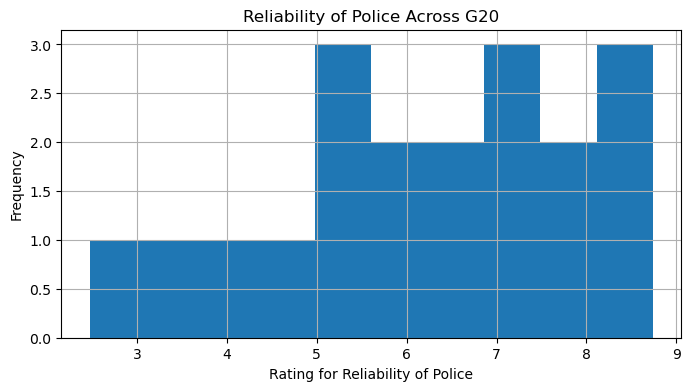

In [109]:
#histogram for reliability of police
hist = g20["ef_legal_police"].hist(figsize=(8,4))
hist.set_xlabel("Rating for Reliability of Police")
hist.set_ylabel("Frequency")
hist.set_title("Reliability of Police Across G20")

Text(0.5, 1.0, 'Fatal Disappearances Across G20')

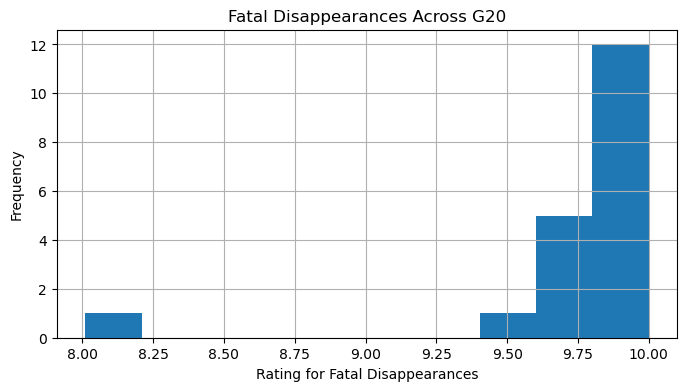

In [110]:
#histogram for fatal disappearances
hist2 = g20["pf_ss_disappearances_fatalities"].hist(figsize=(8,4))
hist2.set_xlabel("Rating for Fatal Disappearances")
hist2.set_ylabel("Frequency")
hist2.set_title("Fatal Disappearances Across G20")

Text(0.5, 1.0, 'Violent Disappearances Across G20')

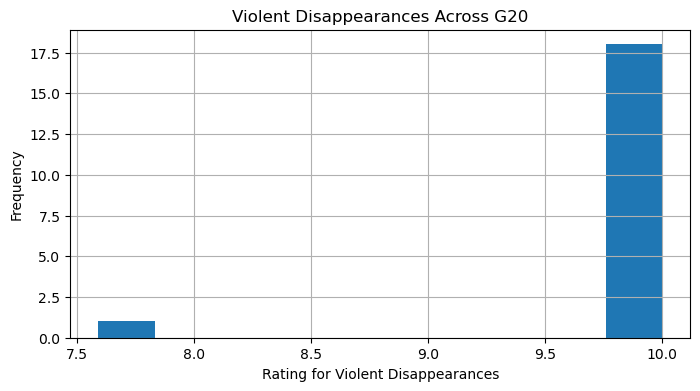

In [111]:
#histogram for violent disappearances
hist3 = g20["pf_ss_disappearances_violent"].hist(figsize=(8,4))
hist3.set_xlabel("Rating for Violent Disappearances")
hist3.set_ylabel("Frequency")
hist3.set_title("Violent Disappearances Across G20")

Text(0.5, 1.0, 'Homicide, Disappearances and Torture Across G20')

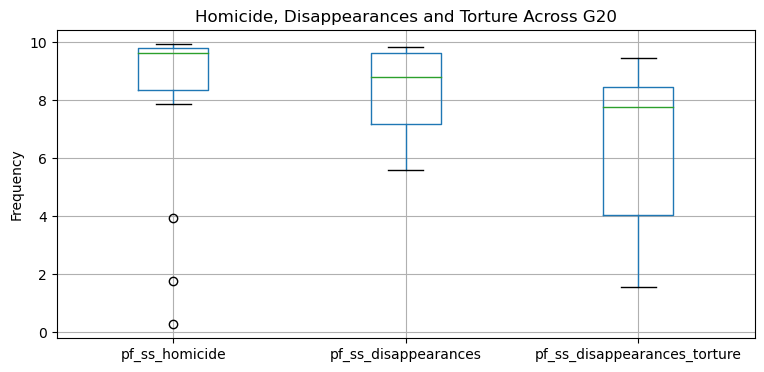

In [112]:
#boxplots for 3 variables, and statistics for all variables
boxplot = g20.boxplot(column = ["pf_ss_homicide", "pf_ss_disappearances", "pf_ss_disappearances_torture"], figsize=(9,4))
boxplot.set_ylabel("Frequency")
boxplot.set_title("Homicide, Disappearances and Torture Across G20")


In [113]:
stats_hom = g20["pf_ss_homicide"].median()
print(stats_hom)

9.61627906976744


In [114]:
stats_hom2 = g20["pf_ss_homicide"].describe()
print(stats_hom2)

count    19.000000
mean      8.222766
std       2.902055
min       0.273256
25%       8.340116
50%       9.616279
75%       9.792151
max       9.927326
Name: pf_ss_homicide, dtype: float64


In [115]:
stats_dis = g20["pf_ss_disappearances"].median()
print(stats_dis)

8.808818834022341


In [116]:
stats_dis2 = g20["pf_ss_disappearances"].describe()
print(stats_dis2)

count    19.000000
mean      8.373776
std       1.480193
min       5.598585
25%       7.161608
50%       8.808819
75%       9.612387
max       9.824465
Name: pf_ss_disappearances, dtype: float64


In [117]:
stats_tor = g20["pf_ss_disappearances_torture"].median()
print(stats_tor)

7.75


In [118]:
stats_tor2 = g20["pf_ss_disappearances_torture"].describe()
print(stats_tor2)

count    19.00000
mean      6.45750
std       2.71086
min       1.53750
25%       4.04000
50%       7.75000
75%       8.46500
max       9.43750
Name: pf_ss_disappearances_torture, dtype: float64


In [119]:
stats_vio = g20["pf_ss_disappearances_violent"].median()
print(stats_vio)

10.0


In [120]:
stats_vio2 = g20["pf_ss_disappearances_violent"].describe()
print(stats_vio2)

count    19.000000
mean      9.855327
std       0.550890
min       7.592083
25%      10.000000
50%      10.000000
75%      10.000000
max      10.000000
Name: pf_ss_disappearances_violent, dtype: float64


In [121]:
stats_vio2 = g20["pf_ss_disappearances_violent"].describe()
print(stats_vio2)

count    19.000000
mean      9.855327
std       0.550890
min       7.592083
25%      10.000000
50%      10.000000
75%      10.000000
max      10.000000
Name: pf_ss_disappearances_violent, dtype: float64


In [122]:
stats_vio2 = g20["pf_ss_disappearances_violent"].describe()
print(stats_vio2)

count    19.000000
mean      9.855327
std       0.550890
min       7.592083
25%      10.000000
50%      10.000000
75%      10.000000
max      10.000000
Name: pf_ss_disappearances_violent, dtype: float64


In [123]:
stats_pol = g20["ef_legal_police"].median()
print(stats_pol)

6.412751675


In [124]:
stats_pol2 = g20["ef_legal_police"].describe()
print(stats_pol2)

count    19.000000
mean      6.216449
std       1.797960
min       2.471419
25%       5.183017
50%       6.412752
75%       7.523319
max       8.742741
Name: ef_legal_police, dtype: float64


In [125]:
#supervised analysis

In [126]:
#create new column with overall ranking


g20.insert(0,"Ranking", " ")

In [127]:
g20

,Ranking,pf_ss_homicide,pf_ss_disappearances,pf_ss_disappearances_violent,pf_ss_disappearances_fatalities,pf_ss_disappearances_torture,ef_legal_police,countries
3,,8.505814,8.503983,10.000000,9.925379,7.7500,4.411544,Argentina
5,,9.747093,9.770714,10.000000,10.000000,8.6175,8.415890,Australia
20,,3.936047,8.057584,10.000000,9.984111,4.5775,3.854661,Brazil
28,,9.427326,9.802754,10.000000,10.000000,8.8900,7.919775,Canada
32,,9.845930,7.108202,9.995137,10.000000,2.5075,5.981356,China
53,,9.616279,9.605602,10.000000,9.800539,8.1375,7.099017,France
57,,9.729651,9.811836,10.000000,9.939464,8.9625,6.831223,Germany
69,,9.142442,7.215013,9.778266,9.618380,6.4475,5.335418,India
70,,9.883721,8.808819,10.000000,9.869892,6.7975,5.623829,Indonesia
75,,9.863372,9.619171,10.000000,10.000000,8.0200,6.412752,Italy


In [128]:
#averages for each country (which we can then put into the rank column)
g20_mean=g20.iloc[:,1:7].mean(axis=1)

g20_mean

3      8.182786
5      9.425200
20     6.734984
28     9.339976
32     7.573021
53     9.043156
57     9.212446
69     7.922836
70     8.497293
75     8.985883
77     9.586713
81     9.333600
99     5.687932
126    6.912345
128    7.643086
137    6.742284
153    6.295958
157    9.063126
158    8.628342
dtype: float64

In [129]:
#check the data type

type(g20_mean)

pandas.core.series.Series

In [130]:
#put the averages for each row into the ranking column

g20_with_ranking=g20.assign(Ranking=g20_mean)
g20_with_ranking

,Ranking,pf_ss_homicide,pf_ss_disappearances,pf_ss_disappearances_violent,pf_ss_disappearances_fatalities,pf_ss_disappearances_torture,ef_legal_police,countries
3,8.182786,8.505814,8.503983,10.000000,9.925379,7.7500,4.411544,Argentina
5,9.425200,9.747093,9.770714,10.000000,10.000000,8.6175,8.415890,Australia
20,6.734984,3.936047,8.057584,10.000000,9.984111,4.5775,3.854661,Brazil
28,9.339976,9.427326,9.802754,10.000000,10.000000,8.8900,7.919775,Canada
32,7.573021,9.845930,7.108202,9.995137,10.000000,2.5075,5.981356,China
53,9.043156,9.616279,9.605602,10.000000,9.800539,8.1375,7.099017,France
57,9.212446,9.729651,9.811836,10.000000,9.939464,8.9625,6.831223,Germany
69,7.922836,9.142442,7.215013,9.778266,9.618380,6.4475,5.335418,India
70,8.497293,9.883721,8.808819,10.000000,9.869892,6.7975,5.623829,Indonesia
75,8.985883,9.863372,9.619171,10.000000,10.000000,8.0200,6.412752,Italy


In [131]:
#segment the target set

Rankings = g20_with_ranking.values[:,0]
print(Rankings)

[8.182786460937828 9.425199508161684 6.734983741314889 9.339975771635535
 7.573020841979559 9.043156222327399 9.212445764601933 7.922836354245341
 8.497293351112665 8.985882514258012 9.586712730568077 9.333600252597822
 5.6879321042839415 6.912345218529379 7.64308564027104 6.742283533990878
 6.295957954788837 9.063126086768948 8.6283424986985]


In [132]:
#segment everything else
g20_no_rankings = g20_with_ranking.values[:,1:6]
print(g20_no_rankings)

[[8.50581395348837 8.50398265047566 10.0 9.925378553329615 7.75]
 [9.747093023255816 9.770714285714286 10.0 10.0 8.6175]
 [3.9360465116279055 8.057583673950898 10.0 9.984110877310536 4.5775]
 [9.42732558139535 9.802754198417862 10.0 10.0 8.89]
 [9.84593023255814 7.108201964455205 9.99513734653067 10.0 2.5075]
 [9.61627906976744 9.605602390416518 10.0 9.800538572113778 8.1375]
 [9.729651162790695 9.811835917894452 10.0 9.939464336926449 8.9625]
 [9.142441860465116 7.215013078589935 9.778265645984108 9.618379952099549
  6.447500000000001]
 [9.883720930232558 8.808818834022341 10.0 9.869891772421084
  6.797499999999999]
 [9.863372093023257 9.619171317524822 10.0 10.0 8.02]
 [9.92732558139535 9.82446453701312 10.0 10.0 9.045]
 [9.825581395348838 9.501071428571429 10.0 10.0 9.4375]
 [1.7529069767441854 6.716192956818297 10.0 9.68457351714117 3.5025]
 [7.869186046511628 5.721808851101374 9.885734912314335 9.81422458124894
  3.1525]
 [9.758720930232558 6.3088334990351935 10.0 9.51071846402515

In [133]:
#now doing linear regression

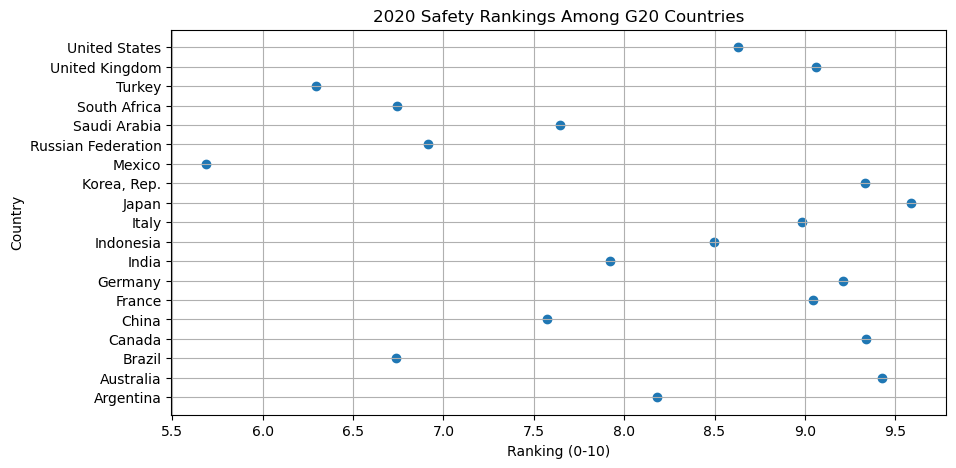

In [134]:
#scatter plot.

fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(g20_with_ranking["Ranking"], g20_with_ranking["countries"])
plt.xlabel("Ranking (0-10)")
plt.ylabel("Country")
plt.grid()
plt.title("2020 Safety Rankings Among G20 Countries")
plt.show()

In [135]:
#now doing linear regression calculations. First, for our target dataset (Rankings) against the rest of the
#data (g20_no_rankings). 

import sklearn.linear_model
model = sklearn.linear_model.LinearRegression()
X_ = np.c_[g20_no_rankings]
y_ = np.c_[Rankings]
# Train the model
model.fit(X_, y_)

LinearRegression()

In [136]:
#checking the model's score. This is the r-squared value, determining how much of the dependent variable's
#variation can be explained by the independent variable. 

model.score(X_,y_)

0.9833551694896188

In [137]:
#next checking the model coefficient. 
model.coef_

array([[ 0.24167198,  0.32200779,  0.68602192, -0.53411455,  0.12694156]])

In [138]:
model.intercept_

array([1.09756533])

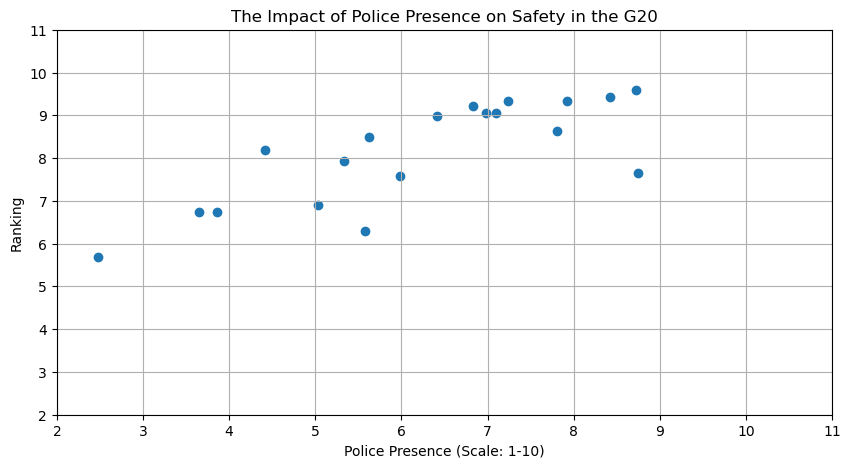

In [139]:
#scatterplot for police presence & overall rankings

fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(g20_with_ranking["ef_legal_police"], g20_with_ranking["Ranking"])
plt.axis([2, 11, 2, 11])
plt.xlabel("Police Presence (Scale: 1-10)")
plt.ylabel("Ranking")
plt.title("The Impact of Police Presence on Safety in the G20")
plt.grid()


plt.show()

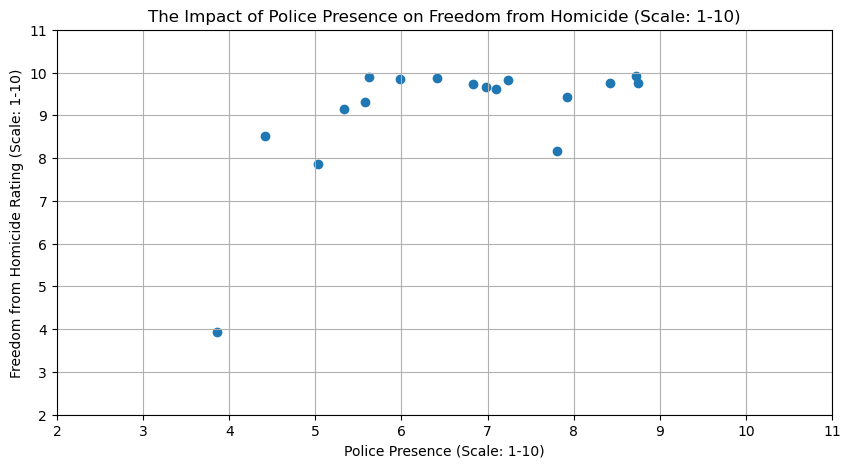

In [140]:
#scatterplot - for homicides - some effect from police

fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(g20_with_ranking["ef_legal_police"], g20_with_ranking["pf_ss_homicide"])
plt.axis([2, 11, 2, 11])
plt.xlabel("Police Presence (Scale: 1-10)")
plt.ylabel("Freedom from Homicide Rating (Scale: 1-10)")
plt.title("The Impact of Police Presence on Freedom from Homicide (Scale: 1-10)")
plt.grid()


plt.show()

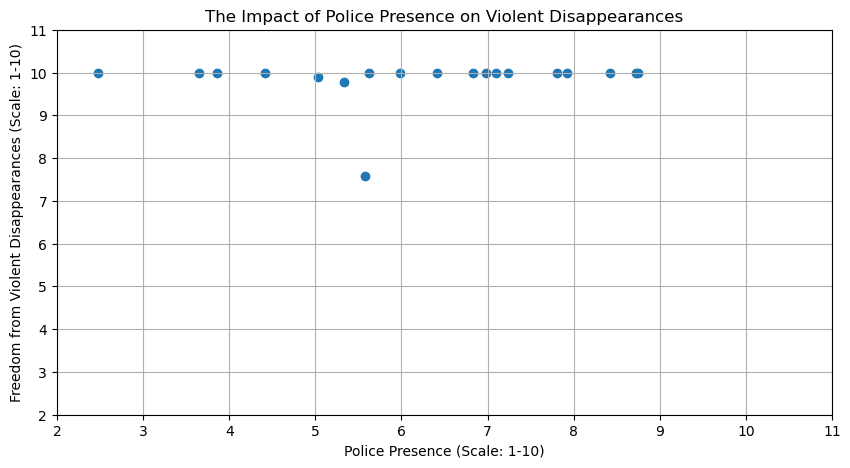

In [141]:
#scatterplot - for disappearances - no effect from police
#scatter plot cont.

fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(g20_with_ranking["ef_legal_police"], g20_with_ranking["pf_ss_disappearances_violent"])
plt.axis([2, 11, 2, 11])
plt.xlabel("Police Presence (Scale: 1-10)")
plt.ylabel("Freedom from Violent Disappearances (Scale: 1-10)")
plt.title("The Impact of Police Presence on Violent Disappearances")
plt.grid()


plt.show()

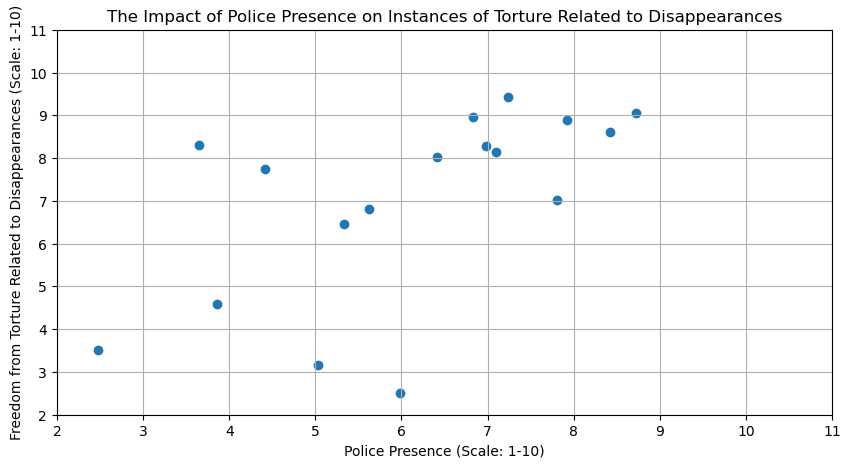

In [142]:
#scatterplot for police & torture
#scatter plot cont.

fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(g20_with_ranking["ef_legal_police"], g20_with_ranking["pf_ss_disappearances_torture"])
plt.axis([2, 11, 2, 11])
plt.xlabel("Police Presence (Scale: 1-10)")
plt.ylabel("Freedom from Torture Related to Disappearances (Scale: 1-10)")
plt.title("The Impact of Police Presence on Instances of Torture Related to Disappearances")
plt.grid()
plt.show()

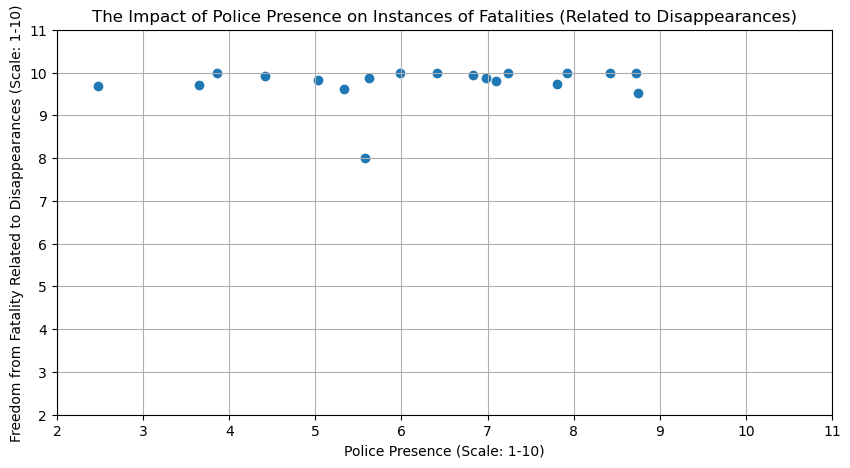

In [143]:
#scatterplot for police & fatalities
#scatter plot cont.

fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(g20_with_ranking["ef_legal_police"], g20_with_ranking["pf_ss_disappearances_fatalities"])
plt.axis([2, 11, 2, 11])
plt.xlabel("Police Presence (Scale: 1-10)")
plt.ylabel("Freedom from Fatality Related to Disappearances (Scale: 1-10)")
plt.title("The Impact of Police Presence on Instances of Fatalities (Related to Disappearances)")
plt.grid()
plt.show()

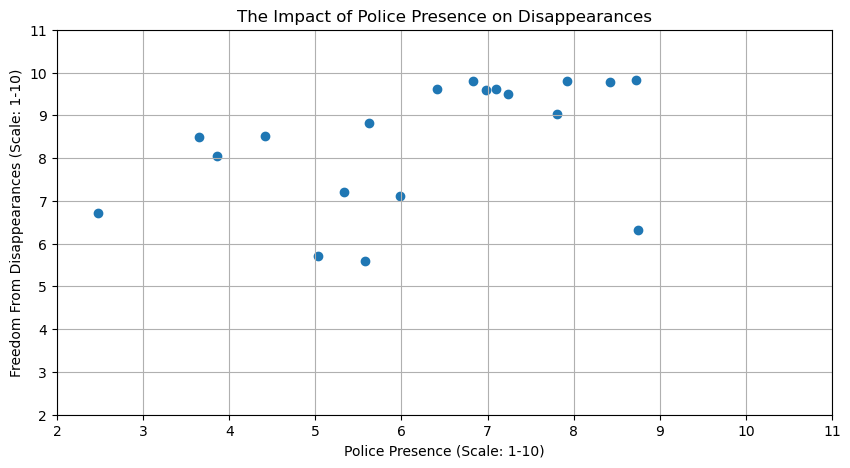

In [144]:
#scatterplot for police & disappearances
#scatter plot cont.

fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(g20_with_ranking["ef_legal_police"], g20_with_ranking["pf_ss_disappearances"])
plt.axis([2, 11, 2, 11])
plt.xlabel("Police Presence (Scale: 1-10)")
plt.ylabel("Freedom From Disappearances (Scale: 1-10)")
plt.title("The Impact of Police Presence on Disappearances")
plt.grid()
plt.show()

In [145]:
#linear regression between torture and police presence - police presence as the indepedent, 
#torture as dependent.

import sklearn.linear_model
model = sklearn.linear_model.LinearRegression()
X_t = np.c_[g20_with_ranking["ef_legal_police"]]
y_t = np.c_[g20_with_ranking["pf_ss_disappearances_torture"]]
# Train the model
model.fit(X_t, y_t)

LinearRegression()

In [146]:
model.score(X_t,y_t)

0.09985269434723476

In [147]:
model.coef_

array([[0.47643861]])

In [148]:
model.intercept_

array([3.49574367])

In [149]:
#linear regression between violent disappearances and police presence - police presence as the indepedent, 
#violent disappearances as dependent.

import sklearn.linear_model
model = sklearn.linear_model.LinearRegression()
X_v = np.c_[g20_with_ranking["ef_legal_police"]]
y_v = np.c_[g20_with_ranking["pf_ss_disappearances_violent"]]
# Train the model
model.fit(X_v, y_v)

LinearRegression()

In [150]:
model.score(X_v,y_v)

0.010940627936701808

In [151]:
model.coef_

array([[0.03204837]])

In [152]:
model.intercept_

array([9.65610035])

In [153]:
#linear regression between total disappearances and police presence - police presence as the indepedent, 
#disappearances as dependent.

import sklearn.linear_model
model = sklearn.linear_model.LinearRegression()
X_dt = np.c_[g20_with_ranking["ef_legal_police"]]
y_dt = np.c_[g20_with_ranking["pf_ss_disappearances"]]
# Train the model
model.fit(X_dt, y_dt)

LinearRegression()

In [154]:
model.score(X_dt,y_dt)

0.20406394929232408

In [155]:
model.coef_

array([[0.37189591]])

In [156]:
model.intercept_

array([6.06190395])

In [157]:
#linear regression between total fatalities and police presence - police presence as the indepedent, 
#fatalities as dependent.

import sklearn.linear_model
model = sklearn.linear_model.LinearRegression()
X_fa = np.c_[g20_with_ranking["ef_legal_police"]]
y_fa = np.c_[g20_with_ranking["pf_ss_disappearances_fatalities"]]
# Train the model
model.fit(X_fa, y_fa)

LinearRegression()

In [158]:
model.score(X_fa,y_fa)

0.01911826232437963

In [159]:
model.coef_

array([[0.03456952]])

In [160]:
model.intercept_

array([9.5469553])

In [161]:
#linear regression between disappearances and police presence - police presence as the indepedent, 
#disappearances as dependent.

import sklearn.linear_model
model = sklearn.linear_model.LinearRegression()
X_d = np.c_[g20_with_ranking["ef_legal_police"]]
y_d = np.c_[g20_with_ranking["pf_ss_disappearances"]]
# Train the model
model.fit(X_d, y_d)

LinearRegression()

In [162]:
model.score(X_d,y_d)

0.20406394929232408

In [163]:
model.coef_

array([[0.37189591]])

In [164]:
model.intercept_

array([6.06190395])

In [165]:
#linear regression between homicide and police presence - police presence as the indepedent, 
#homicide as dependent.

import sklearn.linear_model
model = sklearn.linear_model.LinearRegression()
X = np.c_[g20_with_ranking["ef_legal_police"]]
y = np.c_[g20_with_ranking["pf_ss_homicide"]]
# Train the model
model.fit(X, y)

LinearRegression()

In [166]:
model.score(X,y)

0.5628348251097144

In [167]:
model.coef_

array([[1.21092165]])

In [168]:
model.intercept_

array([0.69513345])

In [169]:
#put linear regression calculation results into a table.
lr_table = pd.DataFrame({
    "Variable": ["Freedom from Torture", "Freedom from Violent Disappearances", "Freedom from Disappearances (Total)", "Freedom from Fatalities", "Freedom from Homicide"],
    "Model Score": [0.0999, 0.011, 0.204, 0.019, 0.5628],
    "Model Coefficients": [0.476, 0.0320, 0.372, 0.035, 1.2109],
    "Model Intercepts": [3.49574, 9.65610, 6.06190, 9.54696, 0.69513]})

display(lr_table)

,Variable,Model Score,Model Coefficients,Model Intercepts
0,Freedom from Torture,0.0999,0.4760,3.49574
1,Freedom from Violent Disappearances,0.0110,0.0320,9.65610
2,Freedom from Disappearances (Total),0.2040,0.3720,6.06190
3,Freedom from Fatalities,0.0190,0.0350,9.54696
4,Freedom from Homicide,0.5628,1.2109,0.69513


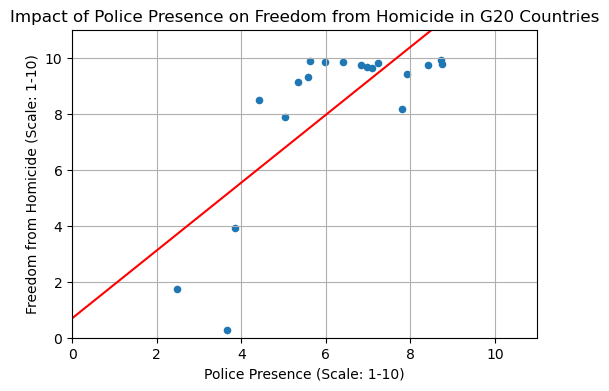

In [170]:
t0, t1 = model.intercept_[0], model.coef_[0][0]
g20_with_ranking.plot(kind='scatter', x="ef_legal_police", y='pf_ss_homicide', figsize=(6,4))
plt.axis([0, 11, 0, 11])
X=np.linspace(0, 60000, 1000) #generate 1000 values between 0 and 60000 to create the line
plt.plot(X, t0 + t1*X, "r")
plt.title("Impact of Police Presence on Freedom from Homicide in G20 Countries")
plt.xlabel("Police Presence (Scale: 1-10)")
plt.ylabel("Freedom from Homicide (Scale: 1-10)")
plt.grid()
plt.show()

In [171]:
# Make a prediction for Australia
X_new = [[8.415890]]  # Australia's impact of police presence on homicide rates.
print(model.predict(X_new))

[[10.88611686]]


In [172]:
# Make a prediction for Japan
X_new_ = [[8.723486]]  # Japan's impact of police presence on homicide rates.
print(model.predict(X_new_))

[[11.25859152]]


In [173]:
#unsupervised - kmeans clustering

In [174]:
data = scale(g20_no_rankings)

In [175]:
newg20 = data.reshape(-1,1)

In [176]:
# This confirms the shape of the dataset
n_samples, n_features = newg20.shape
print("number of rows:", n_samples)
print("number of features:", n_features)

# This gives us the number of different values in the target dataset
n_digits = len(np.unique(Rankings))

# n_digits will be used as the number of clusters 
print("number of different values for the target:", n_digits)

number of rows: 95
number of features: 1
number of different values for the target: 19


In [177]:
# this will allow the create the KMeans Model
kmeans = cluster.KMeans(n_clusters=19)

In [178]:
# Once created, now we can fit the model to the data
kmeans.fit_predict(data)
print(kmeans.get_params())

{'algorithm': 'lloyd', 'copy_x': True, 'init': 'k-means++', 'max_iter': 300, 'n_clusters': 19, 'n_init': 'warn', 'random_state': None, 'tol': 0.0001, 'verbose': 0}


In [179]:
n_samples, n_features = newg20.shape
n_digits = len(np.unique(newg20))
Y2 = LabelEncoder().fit_transform(newg20)
array_silhouette = []
array_completeness = []
array_homogeneity = []
array_Calinski_harabasz = []
clusters = []
for k in range(2, 20):
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(newg20)
    array_silhouette.append(metrics.silhouette_score(newg20, kmeans.labels_))
    array_completeness.append(metrics.completeness_score(Y2, kmeans.labels_))
    array_homogeneity.append(metrics.homogeneity_score(Y2, kmeans.labels_))
    array_Calinski_harabasz.append(metrics.calinski_harabasz_score(newg20, kmeans.labels_))
    clusters.append(k)
    print(k)
    print("silhouette_score = ", metrics.silhouette_score(newg20, kmeans.labels_))
    print("completeness_score = ", metrics.completeness_score(Y2, kmeans.labels_))
    print("homogeneity_score = ", metrics.homogeneity_score(Y2, kmeans.labels_))
    print("Calinski_harabasz Coefficient:", metrics.calinski_harabasz_score(newg20, kmeans.labels_))

2
silhouette_score =  0.7604268946286393
completeness_score =  0.999999999999999
homogeneity_score =  0.11297270635796001
Calinski_harabasz Coefficient: 254.15093296565402
3
silhouette_score =  0.7446896039236507
completeness_score =  0.9999999999999998
homogeneity_score =  0.14224032731130148
Calinski_harabasz Coefficient: 294.05776414159106
4
silhouette_score =  0.576743959645629
completeness_score =  1.0000000000000009
homogeneity_score =  0.27938645852146043
Calinski_harabasz Coefficient: 365.0798058322141
5
silhouette_score =  0.5823231392935285
completeness_score =  1.0000000000000004
homogeneity_score =  0.3050423038818673
Calinski_harabasz Coefficient: 447.55179598729666
6
silhouette_score =  0.5973657819465543
completeness_score =  1.0
homogeneity_score =  0.3712021463851018
Calinski_harabasz Coefficient: 502.79750097729215
7
silhouette_score =  0.5712237935911184
completeness_score =  0.9999999999999997
homogeneity_score =  0.3711591146583704
Calinski_harabasz Coefficient: 63

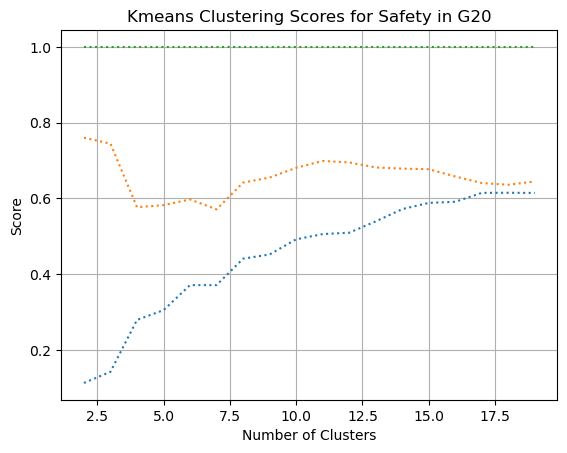

In [180]:
spoints = array_silhouette
hpoints = array_homogeneity
cpoints = array_Calinski_harabasz
copoints= array_completeness

plt.plot(clusters, hpoints, linestyle = 'dotted')
plt.plot(clusters, spoints, linestyle = 'dotted')
plt.plot(clusters, copoints, linestyle = 'dotted')
plt.title("Kmeans Clustering Scores for Safety in G20")
plt.ylabel("Score")
plt.xlabel("Number of Clusters")
plt.grid()

plt.show()

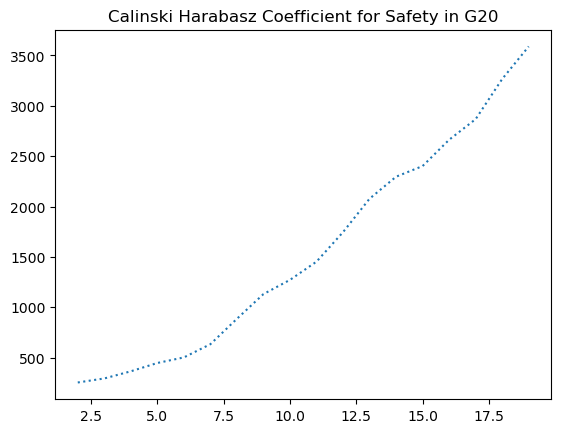

In [181]:
ypoints = array_Calinski_harabasz

plt.plot(clusters, ypoints, linestyle = 'dotted')
plt.title("Calinski Harabasz Coefficient for Safety in G20")


plt.show()